In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline
import zhu_draw as zd
import zhu_contour as zc
import zhu_symmetry as zs
import imp
from matplotlib import pyplot as plt

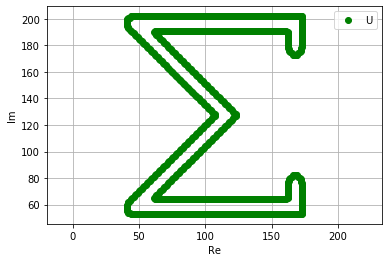

In [2]:
path = "data/truesym_examples/sigma.bmp"
for u in zc.get_contours(path):
    zd.draw_contour('plt', u)
    plt.show()

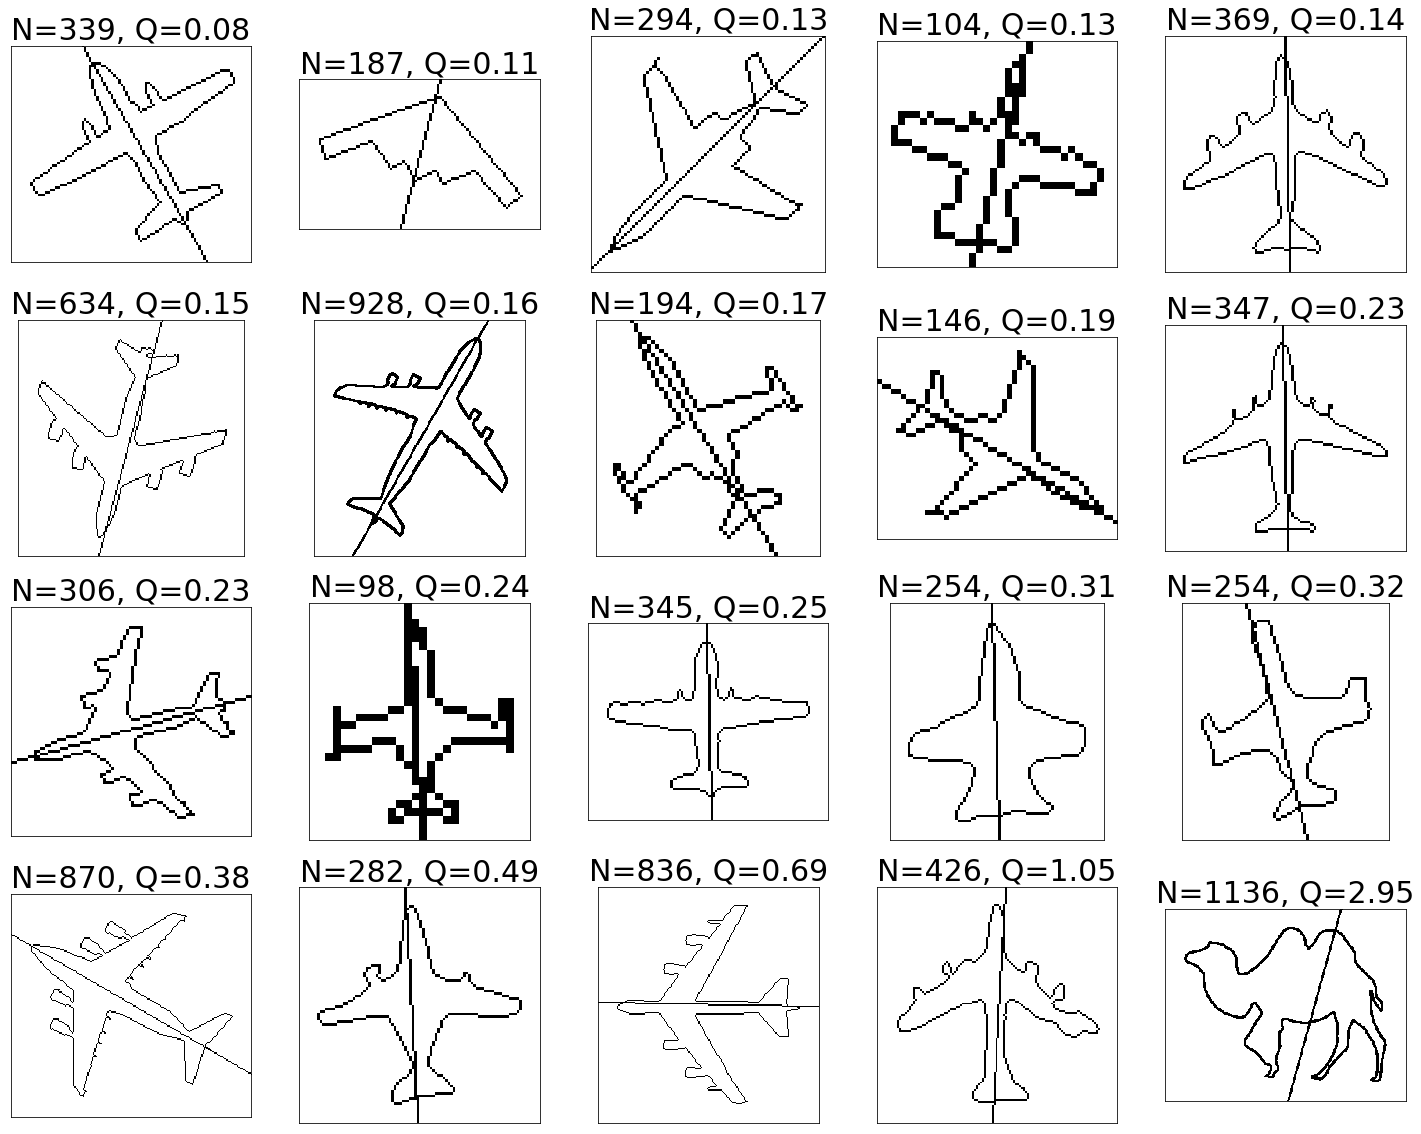

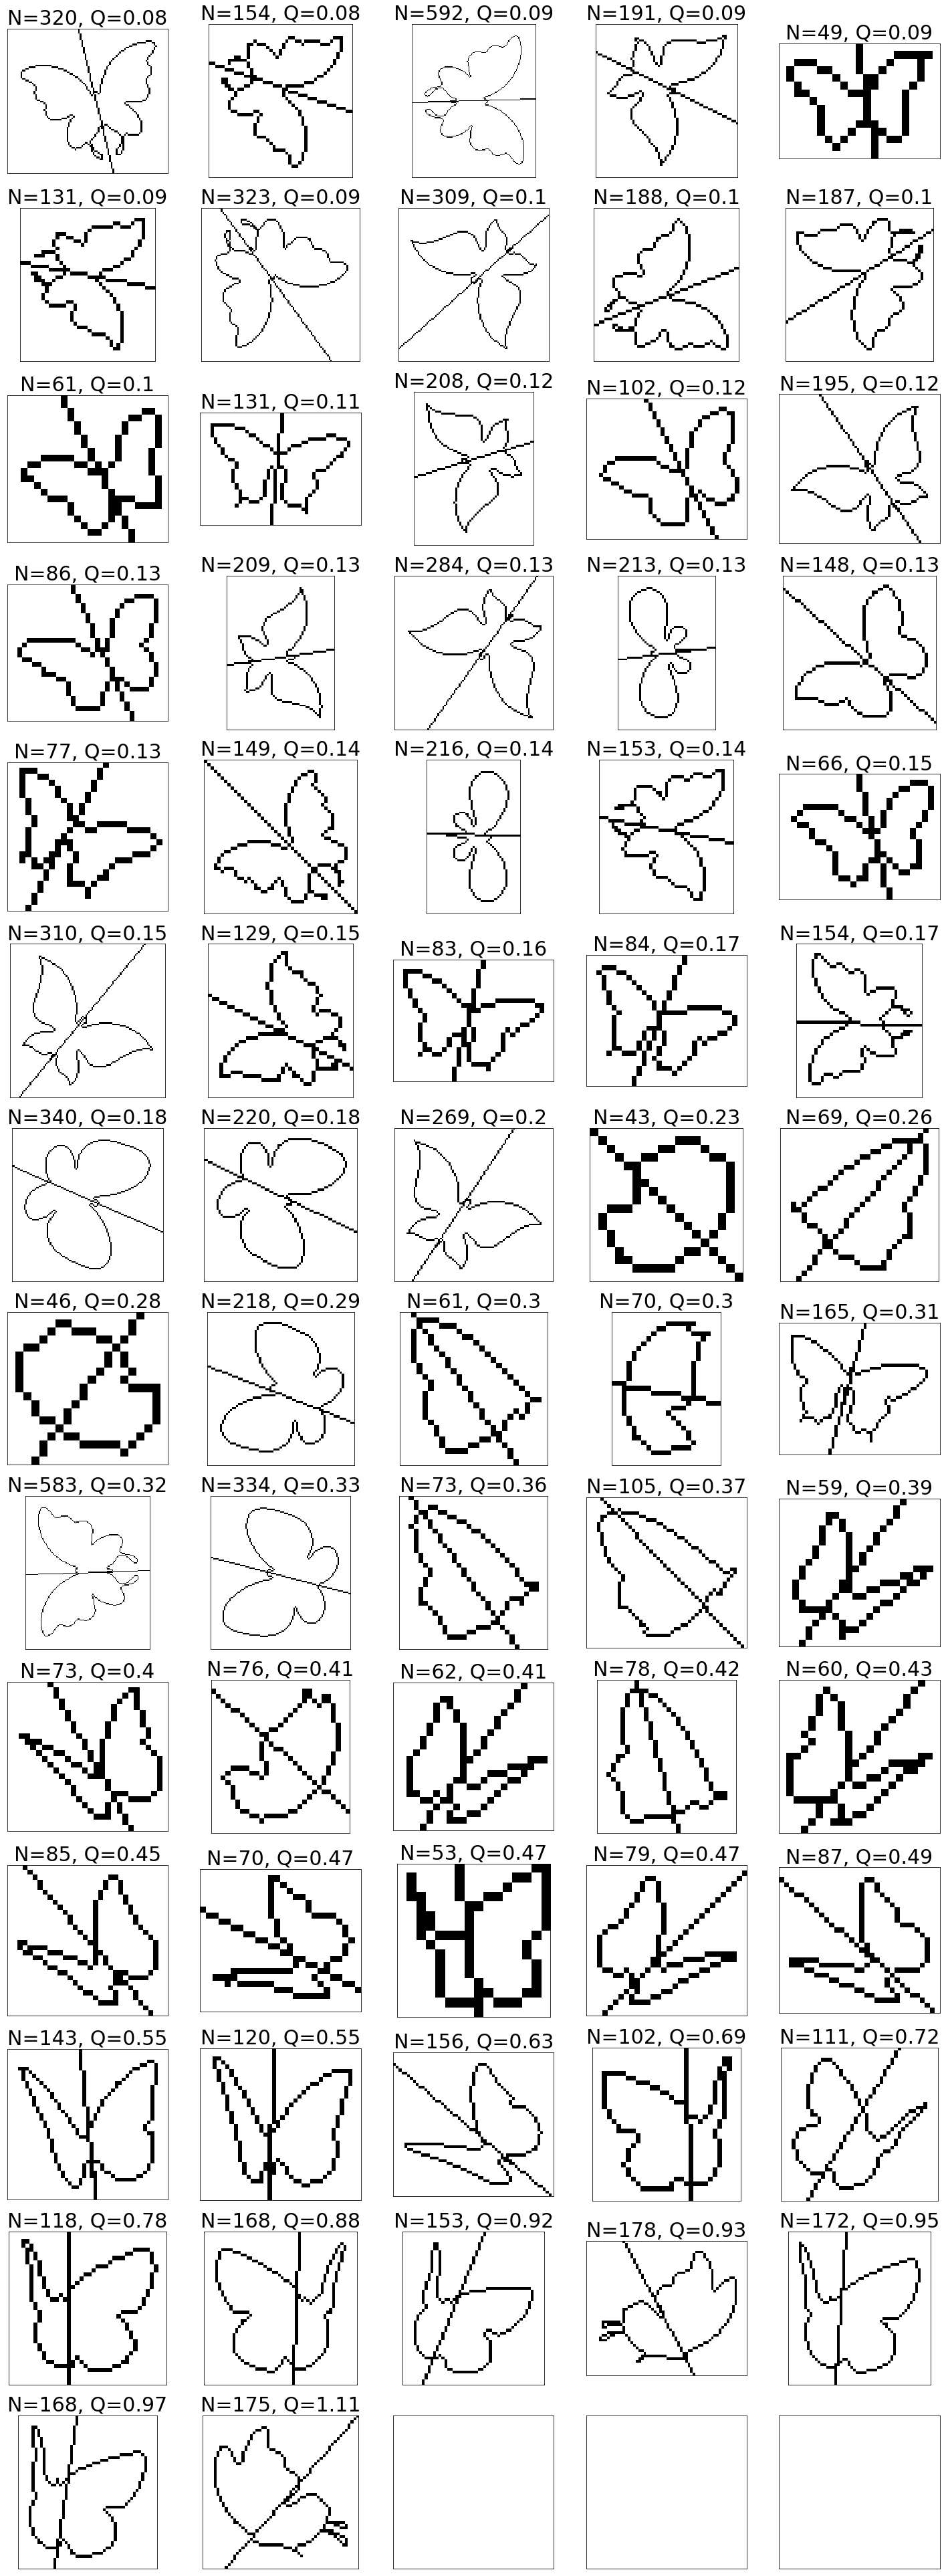

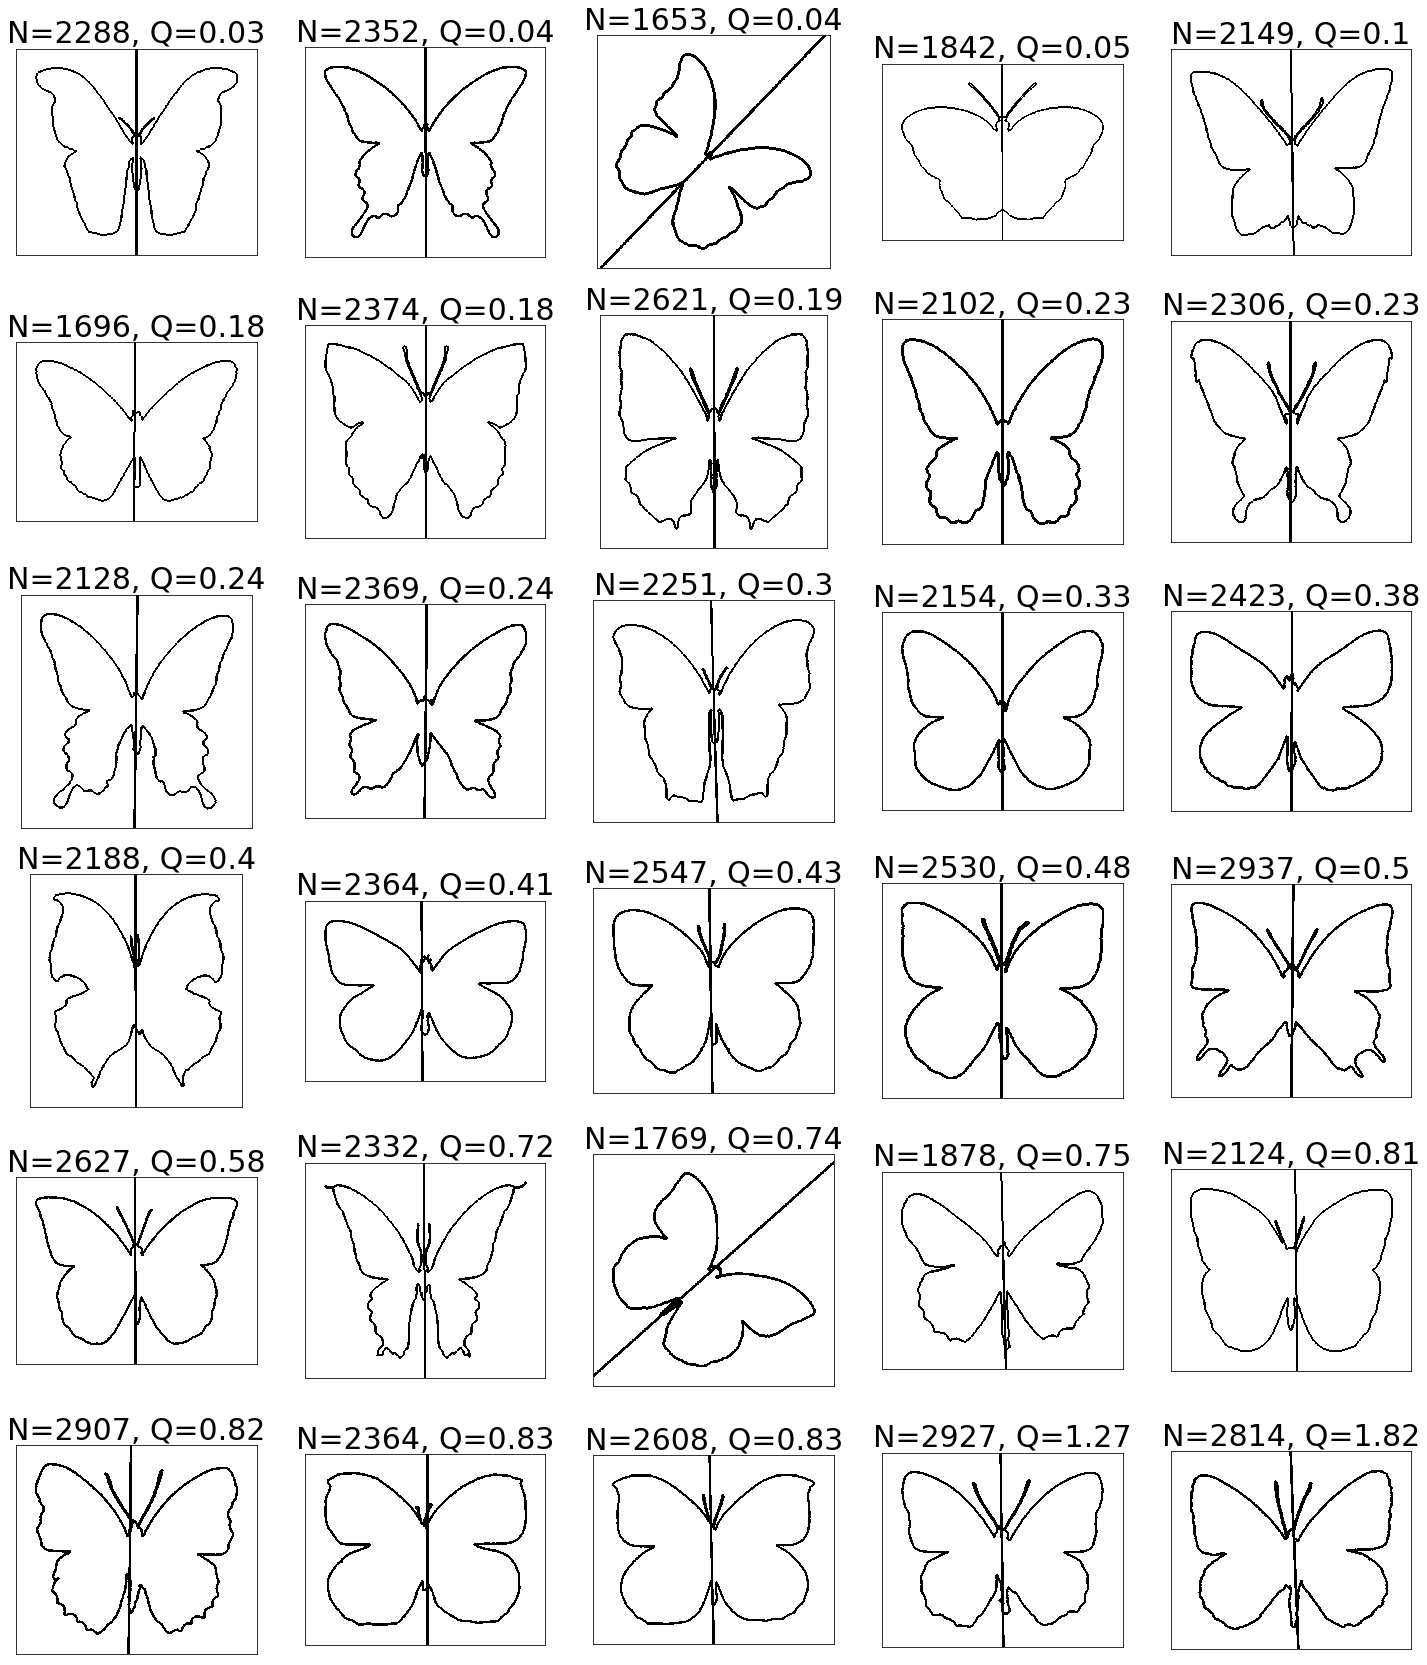

In [3]:
folders = [
    'data/to_visapp/planes',
    'data/to_visapp/many',
    'data/butterfly'
]
for folder in folders:
    zd.subploter(zs.get_drawing_args(folder))
    zd.savefig(folder.split('/')[-1], fmt='png')
    plt.show()

In [4]:
for m in [zc, zd, zs]:
    imp.reload(m)

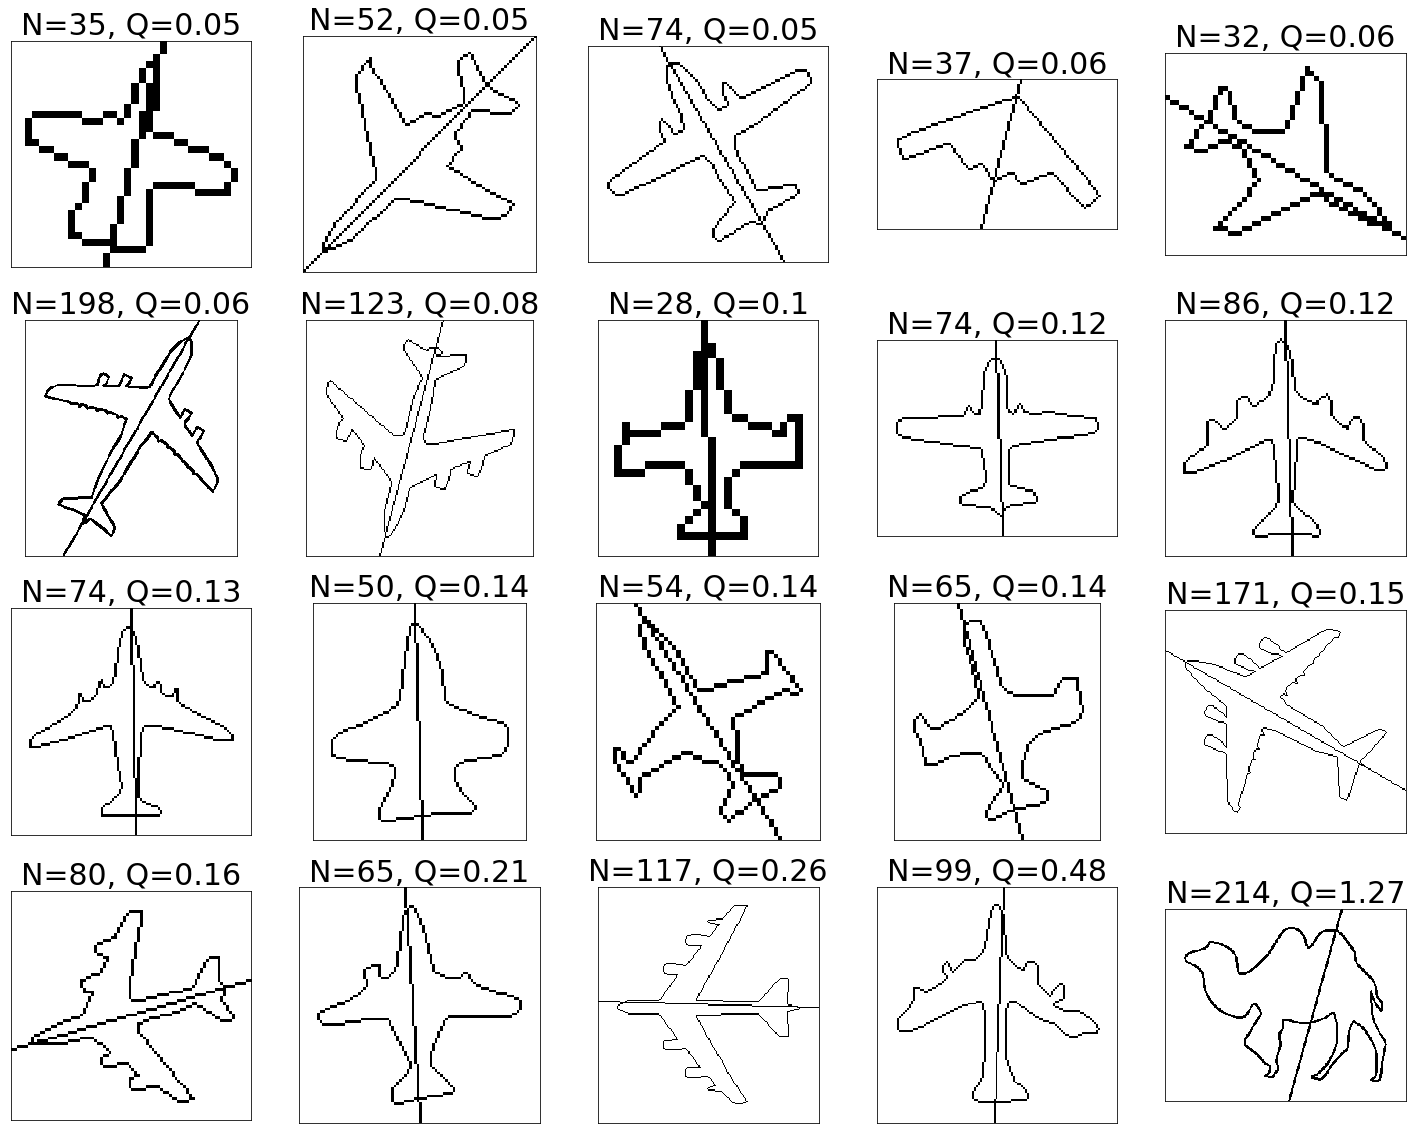

In [5]:
folder = 'data/to_visapp/planes'
zd.subploter(zs.get_drawing_args(folder, False, True))
zd.savefig(folder.split('/')[-1]+'_from_txt', fmt='png')